<a href="https://colab.research.google.com/github/SilviaNeves/Mini-Wiki-Silvia/blob/main/C%C3%B3pia_de_Atividade_Grupo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quais foram os possíveis motivos de desgaste dos funcionários de uma empresa que os levaram a pedir demissão:

 - calcular essas medidas  
 - trazer possíveis causas a partir da interpretação dos resultados

## Importação dos dados

In [ ]:
%pip install -q plotly
import plotly.express as px # visualização gráfica
import plotly.graph_objects as go # visualização gráfica

import matplotlib.pyplot as plt # visualização gráfica
import seaborn as sns # visualização gráfica

import pandas as pd # Para tratamento dos dados
import numpy as np # Para tratamento dos dados

from scipy import stats # Importação do pacote estatística
import statsmodels.api as sm # Bibliotea estatística
from statsmodels.stats.outliers_influence import variance_inflation_factor # Serve para calcular a inflação da variância entre as variáveis explicativas (VIF) para analisar a multicolinearidade
from scipy.stats import mannwhitneyu # Importação do teste U de Mann-Whitney de associação entre cada variável explicativa e "Demissão"
from scipy.stats import boxcox # Esse pacote permite a realizar a transformação de Box-Cox (normalizar os dados)
from scipy.stats import f_oneway # Serve para realizar o teste ANOVA para analisar a significância estatística das variáveis explicativas em relação a variável observada

from sklearn.linear_model import LogisticRegression # importação do pacote LogisticRegression para desenvolvimento da Regressão Logística
from sklearn.preprocessing import StandardScaler, LabelEncoder # pacote para padronização dos dados
from sklearn.model_selection import train_test_split # o pacote train_test_split serve para separar o modelo em dados de treino e teste
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # serve para sumarizar os resultados do modelo Logistico
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

'''
confusion_matrix: serve para criar uma matriz dos resultados obtidos da Regressão Logistica Multinomial da quantidade de acertos e erros das variáveis dummy observadas
accuracy_score: Serve para medir a acurácia do modelo, nada mais é do que calcular a quantidade de acertos
classification_report:
'''

# Correct column name, use 'Carimbo de data/hora'
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT2ii8s_736r0CUIP9dwMWebRoYDeqk5bTsrL9a91CWT5CYgxhfm_7njwq912eeomUQ7tUeWpLpXv6_/pub?gid=962165948&single=true&output=csv', sep =',')
df.head()

,Idade,Demissão,Viagem de negócios,Diárias recebidas,Departamento,Distância de Casa,Escolaridade,Área de Formação,Número de contratos de trabalho na empresa,ID Funcionário,...,Satisfação nas relações Não trabalho,Jornada padrão de trabalho,opção de remaunração variável em ações,Total de anos trabalhados,Qtde de treinamentos realizados no último ano,Equilíbrio vida trabalho,Total de anos trabalhados na empresa,Anos trabalhados na função atual,Anos desde a última promoção,Anos trabalhando com o atual gestor
0,41,Sim,Viaja raramente,1102,Vendas,1,2,Ciências Humanas,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Não,Viaja frequentemente,279,Pesquisa e Desenvolvimento,8,1,Ciências Humanas,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Sim,Viaja raramente,1373,Pesquisa e Desenvolvimento,2,2,Outras,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Não,Viaja frequentemente,1392,Pesquisa e Desenvolvimento,3,4,Ciências Humanas,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,Não,Viaja raramente,591,Pesquisa e Desenvolvimento,2,1,Ciências Médicas,1,7,...,4,80,1,6,3,3,2,2,2,2


## Tratamento dos Dados

In [ ]:
df['Demissão'] = (df['Demissão'].apply(lambda x: 1 if x == 'Sim' else 0)) # Transformando a coluna "Demissão" em variáveis dummy
# df['Faz hora extra'] = (df['Faz hora extra'].apply(lambda x: 1 if x == 'Sim' else 0)) # Transformando a coluna "Faz hora extra" em variáveis dummy
# df['Gênero'] = (df['Gênero'].apply(lambda x: 1 if x == 'Masculino' else 0)) # Transformando a coluna "Trabalha em horário integral" em variáveis dummy
df.drop(columns=['Número de contratos de trabalho na empresa','Maior de idade','Jornada padrão de trabalho'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Idade                                           1470 non-null   int64 
 1   Demissão                                        1470 non-null   int64 
 2   Viagem de negócios                              1470 non-null   object
 3   Diárias recebidas                               1470 non-null   int64 
 4   Departamento                                    1470 non-null   object
 5   Distância de Casa                               1470 non-null   int64 
 6   Escolaridade                                    1470 non-null   int64 
 7   Área de Formação                                1470 non-null   object
 8   ID Funcionário                                  1470 non-null   int64 
 9   Nível de Satisfação com o ambiente de trabalho  1470

## Analise dos dados

### Análise Descritiva dos dados:

In [ ]:
'''
Para realizar uma análise dos dados quantitativos, foi criado um dataframe apenas com os valores quantitativos,
outro com valores qualitativos hierárquicos e um com dados categóricos não hierárquicos:
'''

df_quantitativos = df[['Idade','Diárias recebidas','Distância de Casa', 'Salário por hora','Renda mensal','Salário Mensal',
                 'qtde de empresas que já trabalhou','percentual de aumento de salário', 'Total de anos trabalhados',
                 'Qtde de treinamentos realizados no último ano', 'Total de anos trabalhados na empresa',
                 'Anos trabalhados na função atual', 'Anos desde a última promoção', 'Anos trabalhando com o atual gestor'
                ]].copy(deep=True)

df_quantitativos['percentual de aumento de salário'] = df_quantitativos['percentual de aumento de salário'].apply(lambda x: (x/100) if x != 0 else 0)

df_categorico_hierarquico = df[['Escolaridade','Nível de Satisfação com o ambiente de trabalho', 'Nível de envolvimento com o trabalho', 'Nível hierárquico',
                                'Satisfação com o trabalho', 'score de performance','Satisfação nas relações Não trabalho','opção de remaunração variável em ações',
                                'Equilíbrio vida trabalho'
                                ]]

df_demissao = df[['Demissão']]
base_categorico = df_categorico_hierarquico.columns.tolist() + df_quantitativos.columns.tolist() + df_demissao.columns.tolist() + ['ID Funcionário']
df_categorico_nao_hierarquico = df.drop(columns=base_categorico)

analise_descritiva = pd.DataFrame(df_quantitativos.describe())
analise_descritiva

,Idade,Diárias recebidas,Distância de Casa,Salário por hora,Renda mensal,Salário Mensal,qtde de empresas que já trabalhou,percentual de aumento de salário,Total de anos trabalhados,Qtde de treinamentos realizados no último ano,Total de anos trabalhados na empresa,Anos trabalhados na função atual,Anos desde a última promoção,Anos trabalhando com o atual gestor
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.920408,6502.931293,14313.103401,2.693197,0.152095,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.337481,4707.956783,7117.786044,2.498009,0.036599,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,0.120000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,0.140000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,84.000000,8379.000000,20461.500000,4.000000,0.180000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,0.250000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_qualitativo_encode = df_categorico_nao_hierarquico.copy(deep=True)
encode = LabelEncoder()
for coluna in df_qualitativo_encode.columns:
  df_qualitativo_encode[coluna] = encode.fit_transform(df_qualitativo_encode[coluna])
df_variaveis = pd.concat([df_qualitativo_encode, df_quantitativos, df_categorico_hierarquico], axis=1)

#### Verificando a existência de valores nulos em "df_variaveis":

In [ ]:
print(df_variaveis.isnull().sum()) # Para verificar se existe algum valor nulo em "df_variaveis"

Viagem de negócios                                0
Departamento                                      0
Área de Formação                                  0
Gênero                                            0
Cargo                                             0
Estado civil                                      0
Faz hora extra                                    0
Idade                                             0
Diárias recebidas                                 0
Distância de Casa                                 0
Salário por hora                                  0
Renda mensal                                      0
Salário Mensal                                    0
qtde de empresas que já trabalhou                 0
percentual de aumento de salário                  0
Total de anos trabalhados                         0
Qtde de treinamentos realizados no último ano     0
Total de anos trabalhados na empresa              0
Anos trabalhados na função atual                  0
Anos desde a

### Análise da Correlação das variáveis *Quantitativas*:

#### Matriz de Correlação


  ********************* Principais insights *********************:

  ✔ A forte correlação entre "Idade" e "Total de anos trabalhados" (Coef. de correlação: 0.68) demonstra que 
    quanto mais tempo de empresa tem o funcionário maior a idade dele.
  
  ✔ O coeficiente de correlação entre "Renda mensal" e "Total de anos trabalhados" (Coef. de correlação: 0.77) demonstra que 
    quanto mais tempo de empresa tem o funcionário maior a renda dele.
  
  ✔ O gráfico demonstrou que há fortes correlações entre diversas variáveis, podendo implicar em multicolinearidade entre as variáveis:
      ➤ Total de anos trabalhados na empresa e Anos trabalhados na função atual (Coef. de correlação: 0.76)
      ➤ Total de anos trabalhados na empresa  e Anos trabalhando com o atual gestor (Coef. de correlação: 0.77)
      ➤ Anos trabalhados na função atual e Anos trabalhando com o atual gestor (Coef. de correlação: 0.71)
      ➤ Anos trabalhados na função atualo e Anos trabalhados na empresa (Coef. de co

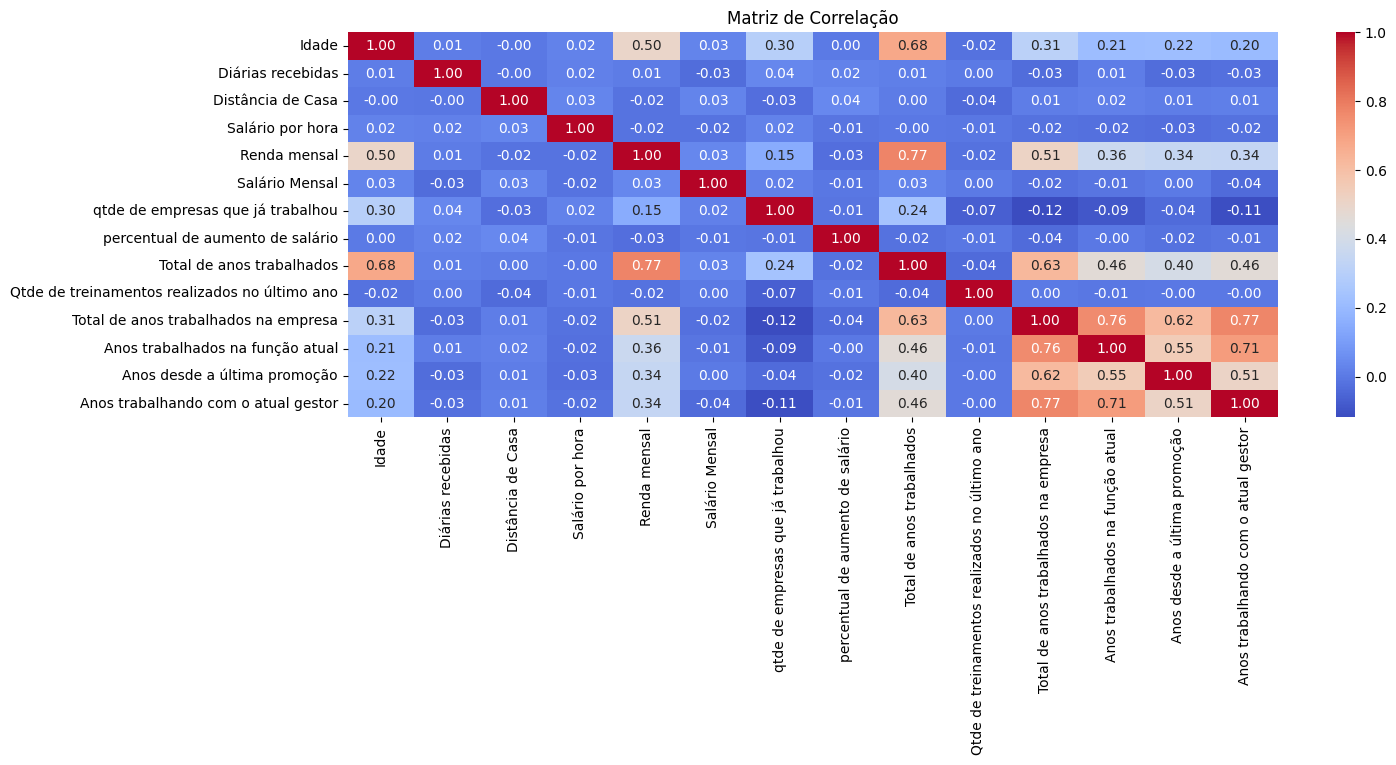

In [ ]:
matriz_correlacao = df_quantitativos.corr()
plt.figure(figsize=(15,5))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')

print(f'''
  ********************* Principais insights *********************:\n
  ✔ A forte correlação entre "Idade" e "Total de anos trabalhados" (Coef. de correlação: {(df_quantitativos[['Idade','Total de anos trabalhados']].corr()).loc['Idade','Total de anos trabalhados']:.2f}) demonstra que
    quanto mais tempo de empresa tem o funcionário maior a idade dele.

  ✔ O coeficiente de correlação entre "Renda mensal" e "Total de anos trabalhados" (Coef. de correlação: {(df_quantitativos[['Renda mensal','Total de anos trabalhados']].corr()).loc['Renda mensal','Total de anos trabalhados']:.2f}) demonstra que
    quanto mais tempo de empresa tem o funcionário maior a renda dele.

  ✔ O gráfico demonstrou que há fortes correlações entre diversas variáveis, podendo implicar em multicolinearidade entre as variáveis:
      ➤ Total de anos trabalhados na empresa e Anos trabalhados na função atual (Coef. de correlação: {(df_quantitativos[['Total de anos trabalhados na empresa','Anos trabalhados na função atual']].corr()).loc['Total de anos trabalhados na empresa','Anos trabalhados na função atual']:.2f})
      ➤ Total de anos trabalhados na empresa  e Anos trabalhando com o atual gestor (Coef. de correlação: {(df_quantitativos[['Total de anos trabalhados na empresa','Anos trabalhando com o atual gestor']].corr()).loc['Total de anos trabalhados na empresa','Anos trabalhando com o atual gestor']:.2f})
      ➤ Anos trabalhados na função atual e Anos trabalhando com o atual gestor (Coef. de correlação: {(df_quantitativos[['Anos trabalhados na função atual','Anos trabalhando com o atual gestor']].corr()).loc['Anos trabalhados na função atual','Anos trabalhando com o atual gestor']:.2f})
      ➤ Anos trabalhados na função atualo e Anos trabalhados na empresa (Coef. de correlação: {(df_quantitativos[['Anos trabalhados na função atual','Total de anos trabalhados na empresa']].corr()).loc['Anos trabalhados na função atual','Total de anos trabalhados na empresa']:.2f})
  \n***************************************************************
  ''')
plt.show()

### Modelo de Regressão Logistica

#### Treinando o modelo Logistico - Estimar a probabilidade de um funcionário pedir demissão

In [ ]:
oversample = RandomOverSampler(sampling_strategy='auto', random_state=123)
X_resampled, y_resampled = oversample.fit_resample(df_variaveis, df_demissao)

VarX = df_variaveis.copy(deep=True).drop(columns=['Total de anos trabalhados','percentual de aumento de salário'])
X_resampled, y_resampled = oversample.fit_resample(VarX, df_demissao['Demissão'])
VarY = y_resampled

padronizar = StandardScaler()
xTrain_padronizado = padronizar.fit_transform(X_resampled)

Modelo_Logistico = LogisticRegression(max_iter=len(VarY)+1)
Modelo_Logistico.fit(xTrain_padronizado, VarY)
yPred = Modelo_Logistico.predict(xTrain_padronizado)

print(f"Acurácia: {accuracy_score(VarY, yPred):.4f}")
print("Relatório de Classificação:\n", classification_report(VarY, yPred))

Acurácia: 0.7652
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      1233
           1       0.76      0.77      0.77      1233

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466



#### Selecionando as variáveis estatisticamente significantes

In [ ]:
modelo_statsmodels = sm.Logit(VarY, sm.add_constant(xTrain_padronizado))
resultado_Logit_sm = modelo_statsmodels.fit()
p_values_Logit_sm = resultado_Logit_sm.pvalues
Variaveis_Importantes = pd.DataFrame({
    'Variáveis': X_resampled.columns,
    'Coeficientes': np.round(Modelo_Logistico.coef_[0],3),
    'P-Values': np.round(p_values_Logit_sm.values[1:],3)
}).sort_values(by=['P-Values','Coeficientes']).reset_index(drop=True)
Variaveis_Estatis_Significantes = Variaveis_Importantes.loc[Variaveis_Importantes['P-Values'] < 0.05]
Variaveis_Estatis_NAO_Significantes = Variaveis_Importantes.loc[Variaveis_Importantes['P-Values'] >= 0.05]

Optimization terminated successfully.
         Current function value: 0.498157
         Iterations 6


# Interpretações

- Após tratamento dos dados, foram analisadas que o dataset possui variáveis qualitativas hierárquicas e não hierárquicas, e variáveis quantitativas.

- Com isso houve, a necessidade de analisar cada tipo de variável de modo que conseguisse explicar estatisticamente o comportamento de o funcionário pedir demissão ou não, então foram criados 4 dataframes:

  - **df_quantitativos**: compreende todas as variáveis explicativas numéricas: Idade , Diárias recebidas , Distância de Casa ,  Salário por hora , Renda mensal , Salário Mensal ,  qtde de empresas que já trabalhou , percentual de aumento de salário ,  Total de anos trabalhados , Qtde de treinamentos realizados no último ano ,  Total de anos trabalhados na empresa ,  Anos trabalhados na função atual ,  Anos desde a última promoção ,  Anos trabalhando com o atual gestor.

  - **df_categorico_hierarquico**: compreende todas as variáveis explicativas qualitativas hierárquicas: Escolaridade , Nível de Satisfação com o ambiente de trabalho ,  Nível de envolvimento com o trabalho ,  Nível hierárquico ,  Satisfação com o trabalho ,  score de performance , Satisfação nas relações Não trabalho , opção de remaunração variável em ações , Equilíbrio vida trabalho.

  - **df_categorico_nao_hierarquico**: compreende as variáveis explicativas qualitativas não hierárquicas: Viagem de negócios, Departamento, Área de Formação, Gênero, Cargo, Estado civil, Faz hora extra.

  - **df_demissao**: compreende a variável dependente booleana onde, 1 refere-se a "SIM" e 0 a "NÃO" em relação a pedido de demissão de funcionário.


### 1 - Análise das variáveis quantitativas:

In [ ]:
print(f'''
  ********************* Principais insights *********************:\n
  ✔ A forte correlação entre "Idade" e "Total de anos trabalhados" (Coef. de correlação: {(df_quantitativos[['Idade','Total de anos trabalhados']].corr()).loc['Idade','Total de anos trabalhados']:.2f}) demonstra que
    quanto mais tempo de empresa tem o funcionário maior a idade dele.

  ✔ O coeficiente de correlação entre "Renda mensal" e "Total de anos trabalhados" (Coef. de correlação: {(df_quantitativos[['Renda mensal','Total de anos trabalhados']].corr()).loc['Renda mensal','Total de anos trabalhados']:.2f}) demonstra que
    quanto mais tempo de empresa tem o funcionário maior a renda dele.

  ✔ O gráfico demonstrou que há fortes correlações entre diversas variáveis, podendo implicar em multicolinearidade entre as variáveis:
      ➤ Total de anos trabalhados na empresa e Anos trabalhados na função atual (Coef. de correlação: {(df_quantitativos[['Total de anos trabalhados na empresa','Anos trabalhados na função atual']].corr()).loc['Total de anos trabalhados na empresa','Anos trabalhados na função atual']:.2f})
      ➤ Total de anos trabalhados na empresa  e Anos trabalhando com o atual gestor (Coef. de correlação: {(df_quantitativos[['Total de anos trabalhados na empresa','Anos trabalhando com o atual gestor']].corr()).loc['Total de anos trabalhados na empresa','Anos trabalhando com o atual gestor']:.2f})
      ➤ Anos trabalhados na função atual e Anos trabalhando com o atual gestor (Coef. de correlação: {(df_quantitativos[['Anos trabalhados na função atual','Anos trabalhando com o atual gestor']].corr()).loc['Anos trabalhados na função atual','Anos trabalhando com o atual gestor']:.2f})
      ➤ Anos trabalhados na função atualo e Anos trabalhados na empresa (Coef. de correlação: {(df_quantitativos[['Anos trabalhados na função atual','Total de anos trabalhados na empresa']].corr()).loc['Anos trabalhados na função atual','Total de anos trabalhados na empresa']:.2f})
  \n***************************************************************
  ''')


  ********************* Principais insights *********************:

  ✔ A forte correlação entre "Idade" e "Total de anos trabalhados" (Coef. de correlação: 0.68) demonstra que 
    quanto mais tempo de empresa tem o funcionário maior a idade dele.
  
  ✔ O coeficiente de correlação entre "Renda mensal" e "Total de anos trabalhados" (Coef. de correlação: 0.77) demonstra que 
    quanto mais tempo de empresa tem o funcionário maior a renda dele.
  
  ✔ O gráfico demonstrou que há fortes correlações entre diversas variáveis, podendo implicar em multicolinearidade entre as variáveis:
      ➤ Total de anos trabalhados na empresa e Anos trabalhados na função atual (Coef. de correlação: 0.76)
      ➤ Total de anos trabalhados na empresa  e Anos trabalhando com o atual gestor (Coef. de correlação: 0.77)
      ➤ Anos trabalhados na função atual e Anos trabalhando com o atual gestor (Coef. de correlação: 0.71)
      ➤ Anos trabalhados na função atualo e Anos trabalhados na empresa (Coef. de co

### 1 - Análise das variáveis qualitativas:

- Para analisar as variáveis qualitativas constuímos um **modelo de regressão logística pela biblioteca Scikit-Learn**. Para tanto, criamos um dataframe chamado **df_variaveis** que é a junção dos outros dataframes das variáveis explicativas (qualitativas e quantitativas).

  - Obtivemos o seguinte resultados:


>
                          Relatório de Classificação:
                              Acurácia: 0.7652
                  | Demissão | Precision |  Recall | F1-Score
                  |    0     |   0.77    |  0.76   |   0.76
                  |    1     |   0.76    |  0.77   |   0.77
         accuracy |          |           |         |   0.77
        macro avg |          |   0.77    |  0.77   |   0.77
     weighted avg |          |   0.77    |  0.77   |   0.77

    ➲ Acurácia: a acurácia do modelo é de 76.52%, isto é 76,52% das previsões feitas pelo modelo foram corretas.

    ➲ Precision:
        Classe 0 (não demissão): 77% das previsões de "não demissão" feitas pelo modelo estavam corretas.
        Classe 1 (demissão):  76% das previsões de "demissão" feitas pelo modelo estavam corretas.

    ➲ Recall:
        Classe 0 (não demissão): o modelo conseguiu identificar corretamente 76% das instâncias de "não demissão".
        Classe 1 (demissão): o modelo identificou corretamente 77% das instâncias de "demissão".

    ➲ F1-Score:
        Classe 0: um F1-score de 76% reflete um bom equilíbrio entre precisão e recall para a classe "não demissão".
        Classe 1: um F1-score de 77% indica um bom desempenho em termos de equilíbrio entre precisão e recall para a classe "demissão".

    ➲ Média (Macro e Ponderada):
        A média macro e ponderada de precisão, recall e F1-score é de 77% para todas as métricas, o que reforça que o modelo tem um bom desempenho global e equilibrado, sem grandes variações entre as classes.
    
    ⁂ Conclusão:
      O modelo apresenta um bom desempenho geral, com uma acurácia de 76,52% e resultados equilibrados para ambas as classes (0 e 1).
      Ele consegue identificar corretamente tanto as instâncias de "não demissão" quanto de "demissão" de maneira eficiente, sem um grande viés para uma classe específica.

  - **Precision**: Mede a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.

  - **Recall (Sensibilidade)**: Mede a capacidade do modelo de identificar corretamente as instâncias positivas.

  - **F1-Score**: Média harmônica entre Precisão e Recall, equilibrando os dois indicadores.









### 2 - Selecão das variáveis:

- Para escola das variáveis importantes foi utilizado outra biblioteca "statsmodels" a função Logit para saber o grau de significância das variáveis. Para tanto foram criados dois dataframes:

  - **"Variaveis_Estatis_Significantes"**: que compreende as variáveis cujo p-value foram menores de 0,05, ou seja, há evidência estatística suficiente para rejeitar a hipotese nula de não significância estatística.

  - **Variaveis_Estatis_NAO_Significantes**: compreende as variáveis com evidências estatísticas não são suficientes para rejeitar a hipótese nula.

### 3 - Analisando as variáveis selecionadas:

#### Anos trabalhando com o atual gestor x Demissão

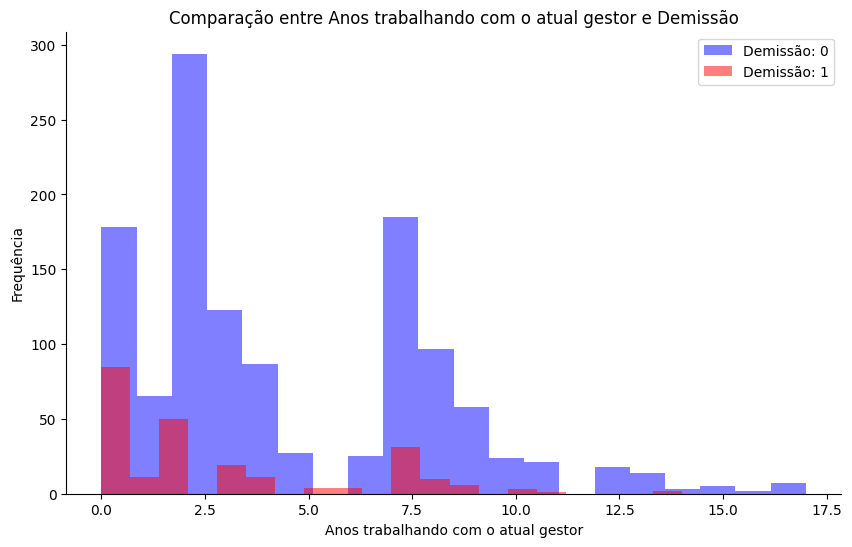

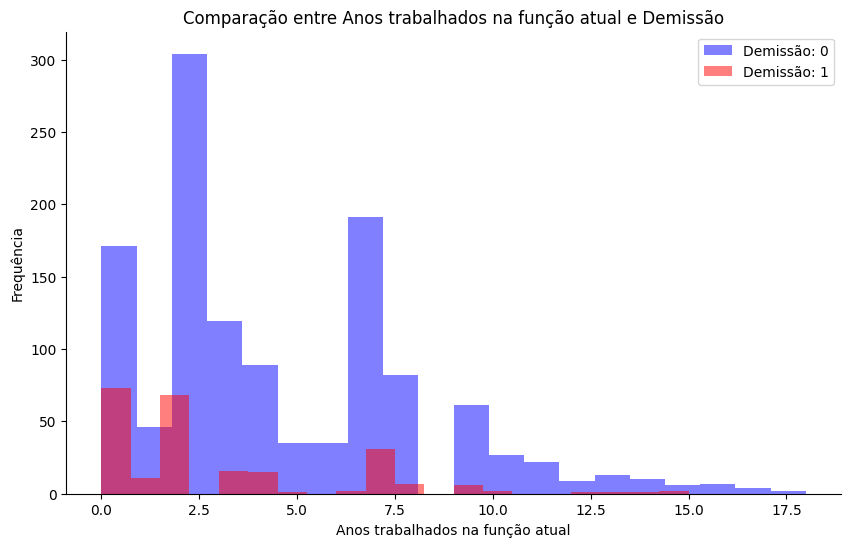



De acordo com os dados é possível observar que quanto mais tempo o funcionário trabalha com o mesmo gestor e 
trabalha na mesma função ele reduzirá a probabilidade de pedir demissão.

Quantidade de Funcionários demitidos (237) e não demitidos (1233)

Anos trabalhando com o atual gestor (média): 
    > 2.85 anos que pedem demissão.
    > 4.37 anos que não pedem demissão.

Anos trabalhados na funcao atual (média):
    > 2.90 anos que pedem demissão.
    > 4.48 anos que não pedem demissão.



In [ ]:
def plot_histogram(df, column_name, title):

    df_demissao_0 = df[df['Demissão'] == 0]
    df_demissao_1 = df[df['Demissão'] == 1]

    plt.figure(figsize=(10, 6))
    plt.hist(df_demissao_0[column_name], bins=20, alpha=0.5, label='Demissão: 0', color='blue')
    plt.hist(df_demissao_1[column_name], bins=20, alpha=0.5, label='Demissão: 1', color='red')

    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequência')
    plt.legend()

    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()


df_Anos_trabalhando_com_o_atual_gestor = df[['Anos trabalhando com o atual gestor','Demissão']]
df_Anos_trabalhados_na_funcao_atual = df[['Anos trabalhados na função atual','Demissão']]

plot_histogram(df_Anos_trabalhando_com_o_atual_gestor, 'Anos trabalhando com o atual gestor', 'Comparação entre Anos trabalhando com o atual gestor e Demissão')
plot_histogram(df_Anos_trabalhados_na_funcao_atual, 'Anos trabalhados na função atual', 'Comparação entre Anos trabalhados na função atual e Demissão')

print(f'''
\nDe acordo com os dados é possível observar que quanto mais tempo o funcionário trabalha com o mesmo gestor e
trabalha na mesma função ele reduzirá a probabilidade de pedir demissão.

Quantidade de Funcionários demitidos ({df.loc[df['Demissão'] == 1,'Demissão'].count()}) e não demitidos ({df.loc[df['Demissão'] == 0, 'Demissão'].count()})

Anos trabalhando com o atual gestor (média):
    > {df_Anos_trabalhando_com_o_atual_gestor.loc[df_Anos_trabalhando_com_o_atual_gestor['Demissão'] == 1, 'Anos trabalhando com o atual gestor'].mean():.2f} anos que pedem demissão.
    > {df_Anos_trabalhando_com_o_atual_gestor.loc[df_Anos_trabalhando_com_o_atual_gestor['Demissão'] == 0, 'Anos trabalhando com o atual gestor'].mean():.2f} anos que não pedem demissão.

Anos trabalhados na funcao atual (média):
    > {df_Anos_trabalhados_na_funcao_atual.loc[df_Anos_trabalhados_na_funcao_atual['Demissão'] == 1, 'Anos trabalhados na função atual'].mean():.2f} anos que pedem demissão.
    > {df_Anos_trabalhados_na_funcao_atual.loc[df_Anos_trabalhados_na_funcao_atual['Demissão'] == 0, 'Anos trabalhados na função atual'].mean():.2f} anos que não pedem demissão.
''')

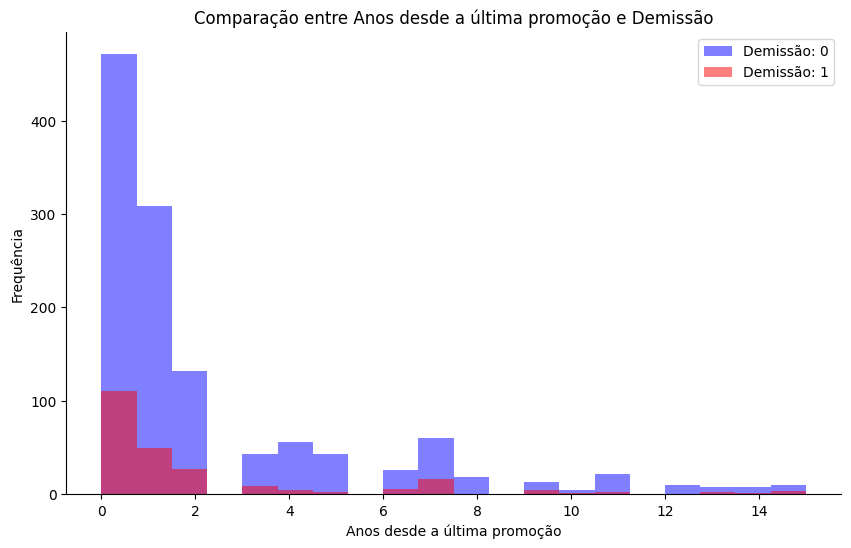

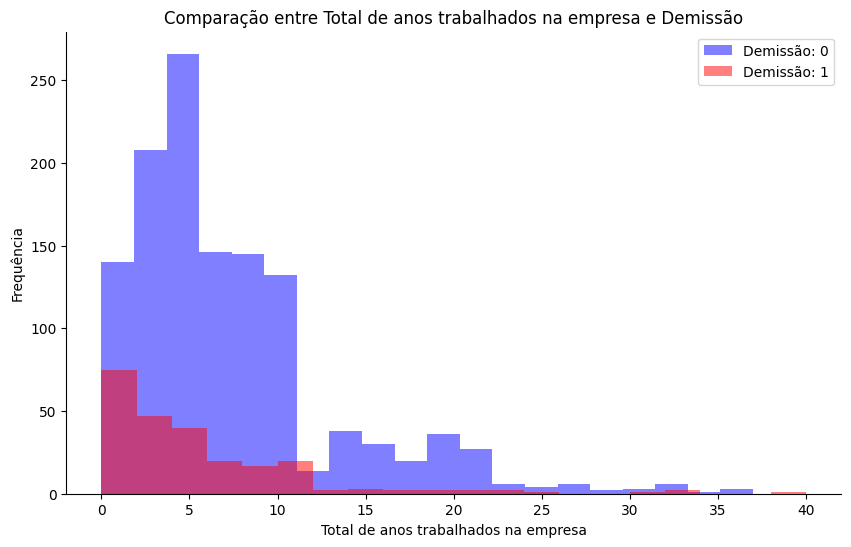



De acordo com os dados é possível observar que quanto mais tempo o funcionário fica sem receber uma promoção ou
muito tempo na mesma empresa, ele aumentará a probabilidade de pedir demissão.

Anos desde a última promoção (média): 
    > 1.95 anos que pedem demissão
    > 2.23 anos que não pedem demissão

Total de anos trabalhados na empresa (média):
    > 5.13 anos que pedem demissão
    > 7.37 anos que não pedem demissão



In [ ]:
df_Anos_desde_a_ultima_promocao = df[['Anos desde a última promoção','Demissão']]
df_Total_de_anos_trabalhados_na_empresa = df[['Total de anos trabalhados na empresa','Demissão']]

plot_histogram(df_Anos_desde_a_ultima_promocao, 'Anos desde a última promoção', 'Comparação entre Anos desde a última promoção e Demissão')
plot_histogram(df_Total_de_anos_trabalhados_na_empresa, 'Total de anos trabalhados na empresa', 'Comparação entre Total de anos trabalhados na empresa e Demissão')

print(f'''
\nDe acordo com os dados é possível observar que quanto mais tempo o funcionário fica sem receber uma promoção ou
muito tempo na mesma empresa, ele aumentará a probabilidade de pedir demissão.

Anos desde a última promoção (média):
    > {df_Anos_desde_a_ultima_promocao.loc[df_Anos_desde_a_ultima_promocao['Demissão'] == 1, 'Anos desde a última promoção'].mean():.2f} anos que pedem demissão
    > {df_Anos_desde_a_ultima_promocao.loc[df_Anos_desde_a_ultima_promocao['Demissão'] == 0, 'Anos desde a última promoção'].mean():.2f} anos que não pedem demissão

Total de anos trabalhados na empresa (média):
    > {df_Total_de_anos_trabalhados_na_empresa.loc[df_Total_de_anos_trabalhados_na_empresa['Demissão'] == 1, 'Total de anos trabalhados na empresa'].mean():.2f} anos que pedem demissão
    > {df_Total_de_anos_trabalhados_na_empresa.loc[df_Total_de_anos_trabalhados_na_empresa['Demissão'] == 0, 'Total de anos trabalhados na empresa'].mean():.2f} anos que não pedem demissão
''')


De acordo com os dados quanto maior o Nível de Satisfação com o ambiente de trabalho menor será a probabilidade do funcionários pedirem demissão



Demissão  Nível de Satisfação com o ambiente de trabalho
0         1                                                 212
          2                                                 244
          3                                                 391
          4                                                 386
1         1                                                  72
          2                                                  43
          3                                                  62
          4                                                  60
Name: count, dtype: int64

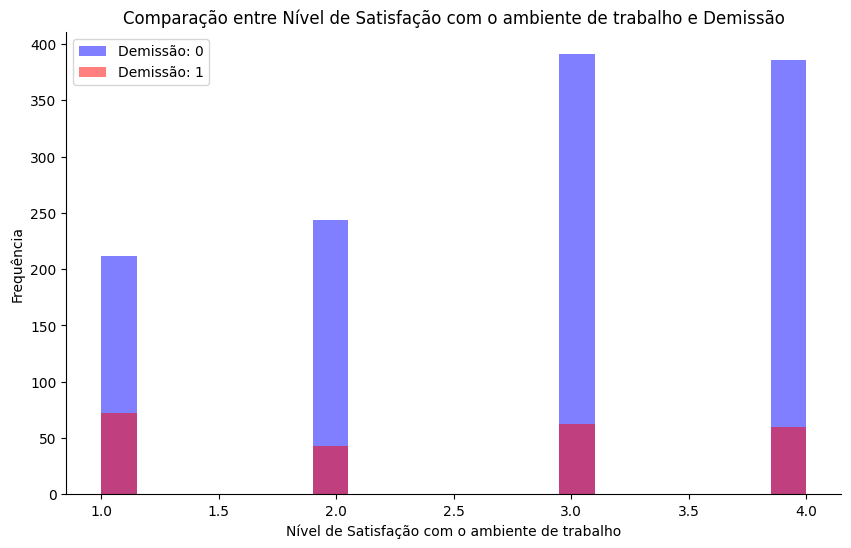

In [ ]:
df_Nivel_de_Satisfacao_com_o_ambiente_de_trabalho = df[['Demissão','Nível de Satisfação com o ambiente de trabalho']]

print(f'\nDe acordo com os dados quanto maior o Nível de Satisfação com o ambiente de trabalho menor será a probabilidade do funcionários pedirem demissão\n')

display(df_Nivel_de_Satisfacao_com_o_ambiente_de_trabalho.value_counts().sort_index())
plot_histogram(df_Nivel_de_Satisfacao_com_o_ambiente_de_trabalho, 'Nível de Satisfação com o ambiente de trabalho', 'Comparação entre Nível de Satisfação com o ambiente de trabalho e Demissão')

In [ ]:
variaveis_quantitativas = list(df_quantitativos.columns.intersection(Variaveis_Estatis_Significantes['Variáveis']))

for var in variaveis_quantitativas:
    mean = df[var].mean()
    mode = df[var].mode()[0]
    median = df[var].median()
    std_dev = df[var].std()

    coef = Variaveis_Estatis_Significantes[Variaveis_Estatis_Significantes['Variáveis'] == var]['Coeficientes'].values[0]

    if coef < 0:
        tendencia = "reduz a probabilidade"
    else:
        tendencia = "aumenta a probabilidade"

    print(f"Analisando a variável: {var}")
    print(f"Média: {mean:.2f}")
    print(f"Moda: {mode:.2f}")
    print(f"Mediana: {median:.2f}")
    print(f"Desvio Padrão: {std_dev:.2f}")
    print(f"O coeficiente é {coef:.3f}, o que indica que a variável {tendencia} de um funcionário pedir demissão.\n")

Analisando a variável: Idade
Média: 36.92
Moda: 35.00
Mediana: 36.00
Desvio Padrão: 9.14
O coeficiente é -0.317, o que indica que a variável reduz a probabilidade de um funcionário pedir demissão.

Analisando a variável: Diárias recebidas
Média: 802.49
Moda: 691.00
Mediana: 802.00
Desvio Padrão: 403.51
O coeficiente é -0.140, o que indica que a variável reduz a probabilidade de um funcionário pedir demissão.

Analisando a variável: Distância de Casa
Média: 9.19
Moda: 2.00
Mediana: 7.00
Desvio Padrão: 8.11
O coeficiente é 0.246, o que indica que a variável aumenta a probabilidade de um funcionário pedir demissão.

Analisando a variável: Renda mensal
Média: 6502.93
Moda: 2342.00
Mediana: 4919.00
Desvio Padrão: 4707.96
O coeficiente é -0.498, o que indica que a variável reduz a probabilidade de um funcionário pedir demissão.

Analisando a variável: qtde de empresas que já trabalhou
Média: 2.69
Moda: 1.00
Mediana: 2.00
Desvio Padrão: 2.50
O coeficiente é 0.356, o que indica que a variável 

# Conclusão:

## **Variáveis Mais Importantes**

⁂ Variáveis que REDUZEM a probabilidade de demissão (coeficiente negativo)
Anos trabalhando com o atual gestor (-0.513)
Renda mensal (-0.498)
Nível de Satisfação com o ambiente de trabalho (-0.382)
Anos trabalhados na função atual (-0.376)
Nível de envolvimento com o trabalho (-0.333)
📌 Interpretação: Quanto mais anos com o gestor, maior a renda, maior a satisfação no ambiente de trabalho e maior o envolvimento, menor a chance de pedir demissão.

Variáveis que AUMENTAM a probabilidade de demissão (coeficiente positivo)
Faz hora extra (+0.774)
Total de anos trabalhados na empresa (+0.558)
Cargo (+0.427)
Anos desde a última promoção (+0.392)
Departamento (+0.391)
Qtde de empresas que já trabalhou (+0.356)
📌 Interpretação: Funcionários que fazem hora extra frequentemente, estão na empresa há muitos anos, passaram por poucas promoções ou já trocaram de emprego várias vezes têm maior probabilidade de pedir demissão.

Conclusão
Mais importantes negativamente (reduzem a chance de demissão): tempo com gestor, renda, satisfação, envolvimento no trabalho.
Mais importantes positivamente (aumentam a chance de demissão): hora extra, tempo total na empresa, falta de promoções, troca de empregos anteriores.
Esses fatores podem ajudar empresas a identificar funcionários em risco e tomar medidas para retenção, como melhorar a satisfação e equilibrar carga de trabalho.